In [ ]:
## merging all files into one master file (csv) for easy analysis

import pandas as pd

files = [
    ("RamaPlot 1-2 Zebra Fish.txt", "Zebrafish", "1-2"),
    ("RamaPlot 2-2.5 Zebra Fish.txt", "Zebrafish", "2-2.5"),
    ("RamaPlot 2.5+ Zebra Fish.txt", "Zebrafish", "2.5+"),
    ("RamaPlot 1-2 Rat.txt", "Rat", "1-2"),
    ("RamaPlot 2-2.5 Rat.txt", "Rat", "2-2.5"),
    ("RamaPlot 2.5+ Rat.txt", "Rat", "2.5+"),
    ("RamaPlot for 1-2 Human.txt", "Human", "1-2"),
    ("RamaPlot for 2-2.5 Human.txt", "Human", "2-2.5"),
    ("RamaPlot for 2.5+ Human.txt", "Human", "2.5+")
]

data = []

for file_name, species, resolution in files:
    with open(file_name, 'r') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue 
            # Expected format: "PDB: <id> | Average phi: <phi> | Average psi: <psi>"
            parts = line.split("|")
            try:
                pdb_id = parts[0].split(":")[1].strip()
                phi = float(parts[1].split(":")[1].strip())
                psi = float(parts[2].split(":")[1].strip())
                data.append({
                    "PDB": pdb_id,
                    "AveragePhi": phi,
                    "AveragePsi": psi,
                    "Species": species,
                    "Resolution": resolution
                })
            except (IndexError, ValueError) as e:
                print(f"Error processing line in {file_name}: {line}")
                continue

master_df = pd.DataFrame(data)

master_df.to_csv("master.csv", index=False)

print(master_df.head())

    PDB  AveragePhi  AveragePsi    Species Resolution
0  9EZ1  -65.670234   -2.393472  Zebrafish        1-2
1  9EZ2  -66.572262   -2.333679  Zebrafish        1-2
2  9GYA  -66.845104   -3.109599  Zebrafish        1-2
3  9GYJ  -64.917435   -4.229558  Zebrafish        1-2
4  4Q0A  -66.143859   -3.030663  Zebrafish        1-2


In [ ]:
## EDA

import pandas as pd
import numpy as np
from scipy import stats

# ----------------------------
# 1. Statistical Summaries
# ----------------------------

# Summary statistics grouped by Species and Resolution
grouped_stats = master_df.groupby(['Species', 'Resolution'])[['AveragePhi', 'AveragePsi']].agg(['mean', 'median', 'std'])
print("Summary Statistics (by Species and Resolution):")
print(grouped_stats)

# Overall summary by Species only
species_stats = master_df.groupby('Species')[['AveragePhi', 'AveragePsi']].agg(['mean', 'median', 'std'])
print("\nOverall Summary Statistics by Species:")
print(species_stats)

# Overall summary by Resolution only
resolution_stats = master_df.groupby('Resolution')[['AveragePhi', 'AveragePsi']].agg(['mean', 'median', 'std'])
print("\nOverall Summary Statistics by Resolution:")
print(resolution_stats)

# ----------------------------
# 2. Correlation Analysis
# ----------------------------

# Overall correlation between AveragePhi and AveragePsi (Pearson and Spearman)
overall_pearson = master_df[['AveragePhi', 'AveragePsi']].corr(method='pearson')
overall_spearman = master_df[['AveragePhi', 'AveragePsi']].corr(method='spearman')
print("\nOverall Pearson Correlation between Phi and Psi:")
print(overall_pearson)
print("\nOverall Spearman Correlation between Phi and Psi:")
print(overall_spearman)

# Correlation within each species
print("\nCorrelation Analysis within each species:")
for species in master_df['Species'].unique():
    subset = master_df[master_df['Species'] == species]
    species_pearson = subset[['AveragePhi', 'AveragePsi']].corr(method='pearson')
    species_spearman = subset[['AveragePhi', 'AveragePsi']].corr(method='spearman')
    print(f"\nSpecies: {species}")
    print("Pearson correlation:")
    print(species_pearson)
    print("Spearman correlation:")
    print(species_spearman)

Summary Statistics (by Species and Resolution):
                     AveragePhi                      AveragePsi            \
                           mean     median       std       mean    median   
Species   Resolution                                                        
Human     1-2        -65.281237 -65.309900  0.879981  -4.043401 -3.208071   
          2-2.5      -65.449721 -65.418672  1.325634  -5.653212 -6.160946   
          2.5+       -65.764428 -65.553338  1.608772  -5.587239 -6.003140   
Rat       1-2        -64.914250 -65.122829  1.061397  -6.856532 -7.067803   
          2-2.5      -65.106466 -64.963892  1.402415  -7.214185 -6.938861   
          2.5+       -64.060256 -64.374194  1.838561  -6.384298 -6.578496   
Zebrafish 1-2        -65.947071 -65.907046  0.713282  -2.968826 -2.873323   
          2-2.5      -66.223011 -66.143608  1.053389  -4.701064 -5.080830   
          2.5+       -66.123489 -65.670585  1.389245  -6.047551 -6.055464   

                           

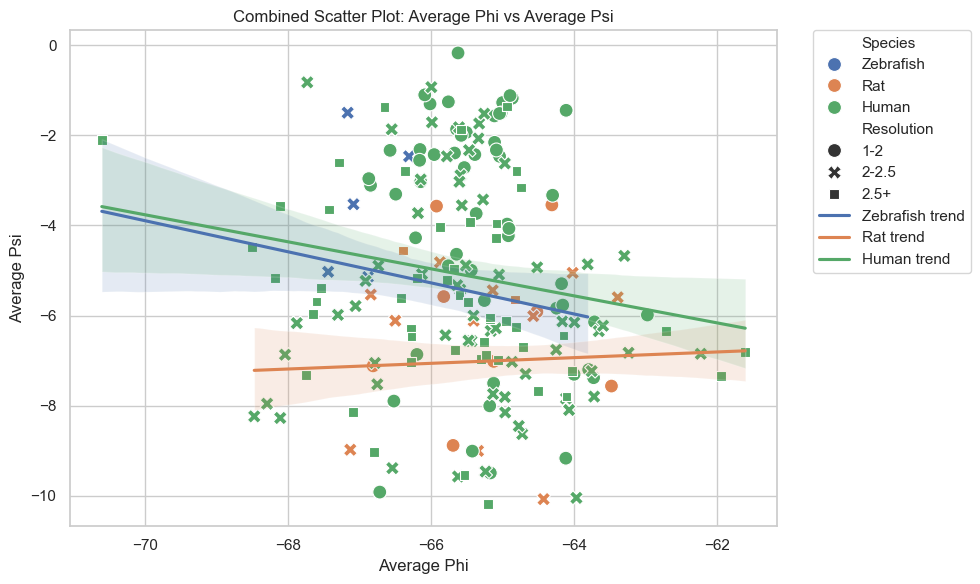

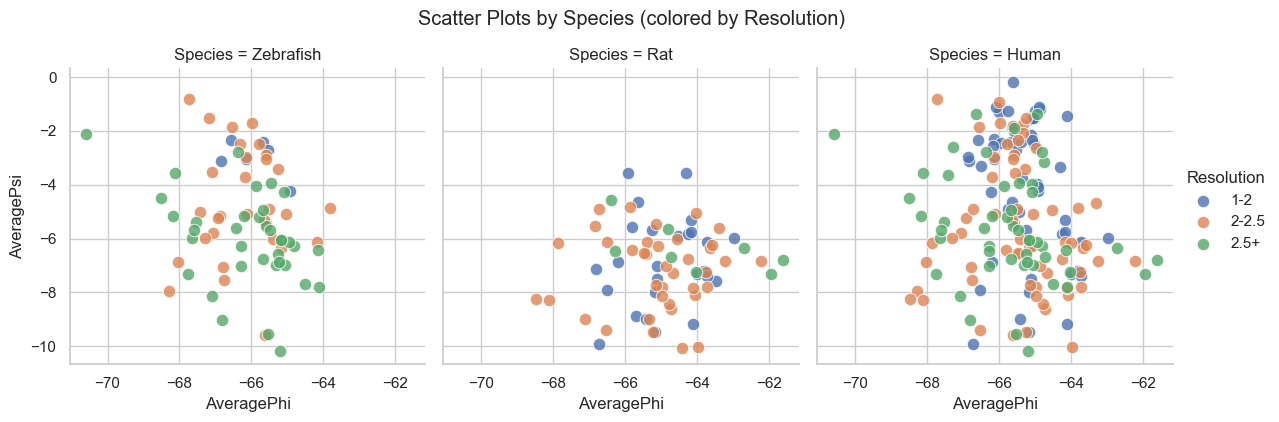

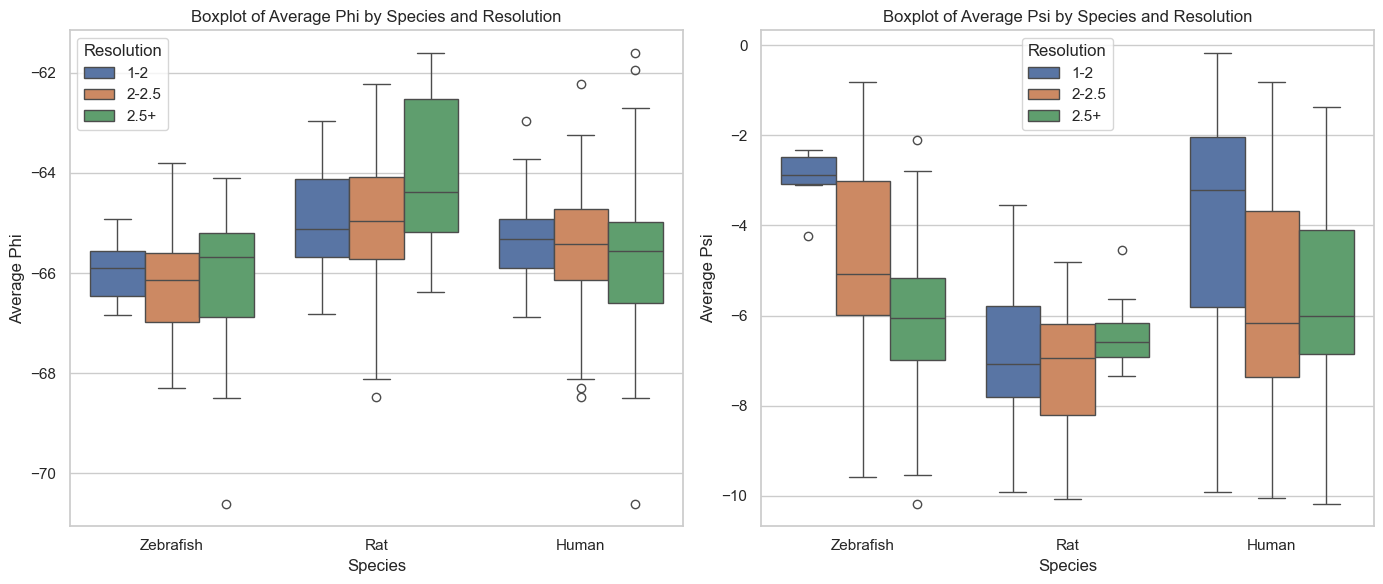

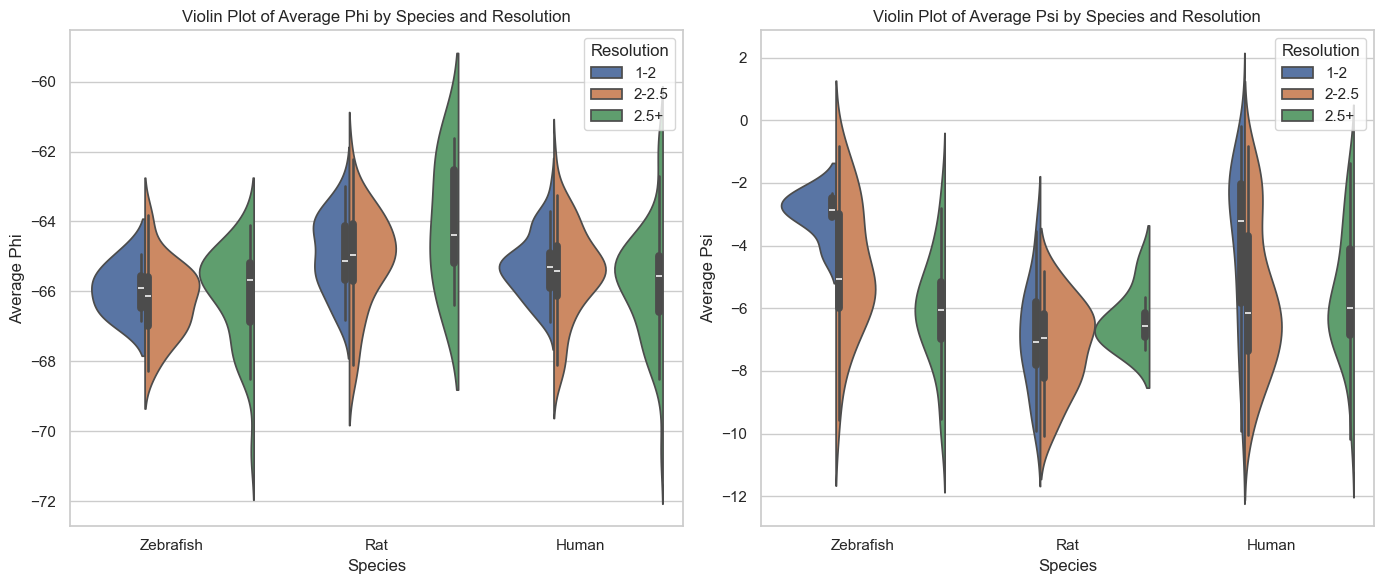

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1. Combined Scatter Plot with Regression Lines for each species
plt.figure(figsize=(10, 6))

scatter = sns.scatterplot(
    data=master_df, 
    x="AveragePhi", 
    y="AveragePsi", 
    hue="Species", 
    style="Resolution", 
    s=100, 
    palette="deep"
)
for species in master_df["Species"].unique():
    subset = master_df[master_df["Species"] == species]

    sns.regplot(
        data=subset, 
        x="AveragePhi", 
        y="AveragePsi", 
        scatter=False, 
        label=f"{species} trend"
    )

plt.title("Combined Scatter Plot: Average Phi vs Average Psi")
plt.xlabel("Average Phi")
plt.ylabel("Average Psi")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()

# 2. Species-specific Scatter Plots (Facet Grid)
g = sns.FacetGrid(master_df, col="Species", hue="Resolution", height=4, aspect=1)
g.map(sns.scatterplot, "AveragePhi", "AveragePsi", alpha=0.8, s=80)
g.add_legend()
g.fig.suptitle("Scatter Plots by Species (colored by Resolution)", y=1.05)
plt.show()

# 3. Distribution Plots using Boxplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(ax=axes[0], data=master_df, x="Species", y="AveragePhi", hue="Resolution")
axes[0].set_title("Boxplot of Average Phi by Species and Resolution")
axes[0].set_xlabel("Species")
axes[0].set_ylabel("Average Phi")

sns.boxplot(ax=axes[1], data=master_df, x="Species", y="AveragePsi", hue="Resolution")
axes[1].set_title("Boxplot of Average Psi by Species and Resolution")
axes[1].set_xlabel("Species")
axes[1].set_ylabel("Average Psi")

plt.tight_layout()
plt.show()

# 4. Distribution Plots using Violin Plots (not necessarily better than boxplots, but ig can be useful)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.violinplot(ax=axes[0], data=master_df, x="Species", y="AveragePhi", hue="Resolution", split=True)
axes[0].set_title("Violin Plot of Average Phi by Species and Resolution")
axes[0].set_xlabel("Species")
axes[0].set_ylabel("Average Phi")

sns.violinplot(ax=axes[1], data=master_df, x="Species", y="AveragePsi", hue="Resolution", split=True)
axes[1].set_title("Violin Plot of Average Psi by Species and Resolution")
axes[1].set_xlabel("Species")
axes[1].set_ylabel("Average Psi")

plt.tight_layout()
plt.show()

c:\Users\Meiras\anaconda3\envs\deeplearning\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


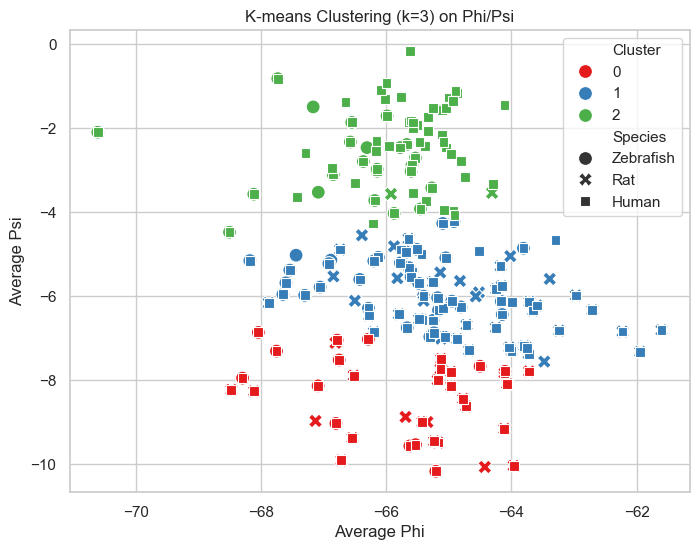

Cluster Centers (Phi, Psi):
[[-65.75952136  -8.41236702]
 [-65.11486214  -6.00381321]
 [-66.00033752  -2.5661875 ]]


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = master_df[['AveragePhi', 'AveragePsi']]

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

master_df['Cluster'] = labels

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=master_df, 
    x='AveragePhi', 
    y='AveragePsi', 
    hue='Cluster',  
    palette='Set1',
    style='Species', 
    s=100
)
plt.title("K-means Clustering (k=3) on Phi/Psi")
plt.xlabel("Average Phi")
plt.ylabel("Average Psi")
plt.show()

# Optional: check cluster centers
print("Cluster Centers (Phi, Psi):")
print(kmeans.cluster_centers_)
